In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# example of loading the cifar10 dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10


# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

**Standardization on our Baseline ( 3 VGGs + Increasing Dropout + Batch Norm)**

In [4]:
from sklearn.preprocessing import StandardScaler
def Standardization(X1,X2):
  scaler = StandardScaler()
  
  nsamples, nx, ny,nz = X1.shape
  d1_train_dataset = X1.reshape((nsamples,nx*ny*nz))
  standardized_1 = scaler.fit_transform(d1_train_dataset)

  nsampless, nxx, nyy,nzz = X2.shape
  d2_train_dataset = X2.reshape((nsampless,nxx*nyy*nzz))
  standardized_2 = scaler.fit_transform(d2_train_dataset)
  
  return standardized_1,standardized_2

In [5]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [7]:
import matplotlib.pyplot as plt

def summarize_diagnostics(history):
	fig, (ax1, ax2) = plt.subplots(2)
	# plot loss
	ax1.set_title('Cross Entropy Loss')
	ax1.plot(history.history['loss'], color='blue', label='train')
	ax1.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	ax2.set_title('Classification Accuracy')
	ax2.plot(history.history['accuracy'], color='blue', label='train')
	ax2.plot(history.history['val_accuracy'], color='orange', label='test')
	fig.tight_layout()
	# save plot to file
	filename = 'Enter filename'
	#plt.savefig(filename + '_plot.png')
	plt.show()

170508288/170498071 [==============================] - 3s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


> 84.490 %


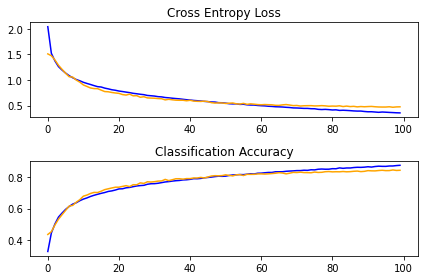

In [8]:
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  trainX, testX =Standardization(trainX, testX)
  # Reshape
  nsamples, nx =trainX.shape
  trainX = trainX.reshape((nsamples,32,32,3))
  nnsamples, nnx =testX.shape
  testX = testX.reshape((nnsamples,32,32,3))
  # define model
  model = define_model()
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0),"%")
  # learning curves
  summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness() 

In [ ]:
# entry point, run the test harness
run_test_harness()

**Deeper Network**

In [ ]:
def define_model_Skip_Deeper():
  input_shape=(32, 32, 3)
  X_input = keras.layers.Input(input_shape)
  x = keras.layers.ZeroPadding2D((3, 3))(X_input)

  x_shortcut=X_input

  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',strides=(2,2), padding='same')(x)
  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x) 
  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2, 2))(x) 

  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2, 2))(x)

  x=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x) 
  x=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2,2))(x)

  x=Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x) 
  x_shortcut=Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2,2))(x_shortcut)

  x_shortcut=Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid',strides=(5, 5))(x_shortcut)
  #print(tf.shape(x))
  #print(tf.shape(x_shortcut))

  x= Add()([x, x_shortcut])

  x=GlobalAveragePooling2D()(x)
  x=Flatten()(x)
  x=Dense(10, activation='softmax',kernel_initializer='he_uniform')(x)
  model = Model(inputs=X_input, outputs=x)
  return model

> 51.290 %


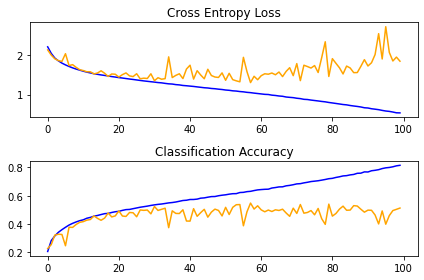

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_Skip_Deeper()
opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
# Evaluate Model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0),"%")
# learning curves
summarize_diagnostics(history)